# H2O AutoML - US Airbnb

In this study, we leverage H2O's AutoML, a state-of-the-art automated machine learning platform, to predict rental prices using a dataset of Airbnb listings in the United States. H2O AutoML is designed to automate the process of applying machine learning models, significantly reducing the time and expertise required for model selection, training, and validation. By analyzing features such as location, property type, and host information, our goal is to develop a predictive model that offers accurate insights into pricing strategies for stakeholders in the sharing economy. This research highlights the efficacy of AutoML in handling complex datasets and generating reliable predictive analytics, showcasing its potential to revolutionize data-driven decision-making in the real estate sector.

In [1]:
!pip install h2o
import pandas as pd
import h2o
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from h2o.automl import H2OAutoML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=d2c2f8ce354471f1c4a18b31c628c88836c0f4e1debf7eb65faa477a2de2f62e
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [2]:
dataset_url = 'https://raw.githubusercontent.com/shraddhabhandarkar3/DataScienceEngineeringMethods/main/sampled_dataset.csv'
df = pd.read_csv(dataset_url)

In [3]:
print(df.head())

                   id                                               name  \
0            33834286   Cozy & private. 14 min drive-Universal/Hollywood   
1            47438863       Beach! Beach! Beach! Walk to Easton's Beach!   
2            32313931    Beachside w/ King Bed, In-Unit W/D & 2x Parking   
3  783749111154402330  Central | Charming | Private Hotel Room | King...   
4            32024054                        Central Victorian 1 Bedroom   

    latitude   longitude        room_type  price  minimum_nights  \
0  34.223970 -118.364410  Entire home/apt     70              30   
1  41.493595  -71.281395  Entire home/apt    200               2   
2  33.904293 -118.420425  Entire home/apt    221               3   
3  40.749645  -73.976280     Private room    116               1   
4  37.768120 -122.444760  Entire home/apt    111              30   

   number_of_reviews last_review  reviews_per_month  \
0                 50  2020-05-30               1.07   
1                 19  20

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162503 entries, 0 to 162502
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162503 non-null  int64  
 1   name                            162503 non-null  object 
 2   latitude                        162503 non-null  float64
 3   longitude                       162503 non-null  float64
 4   room_type                       162503 non-null  object 
 5   price                           162503 non-null  int64  
 6   minimum_nights                  162503 non-null  int64  
 7   number_of_reviews               162503 non-null  int64  
 8   last_review                     162503 non-null  object 
 9   reviews_per_month               162503 non-null  float64
 10  calculated_host_listings_count  162503 non-null  int64  
 11  availability_365                162503 non-null  int64  
 12  number_of_review

In [5]:
print(df.describe())

                 id       latitude      longitude          price  \
count  1.625030e+05  162503.000000  162503.000000  162503.000000   
mean   2.589915e+17      36.596278     -98.322466     258.266801   
std    3.467357e+17       5.136734      19.703101     997.288449   
min    6.000000e+00      25.957790    -123.089130       0.000000   
25%    2.636312e+07      33.971863    -118.315070      91.000000   
50%    4.898217e+07      36.186210     -97.729390     149.000000   
75%    6.637242e+17      40.717075     -77.027600     250.000000   
max    8.581014e+17      47.734010     -70.996000  100000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count   162503.000000      162503.000000      162503.000000   
mean        13.401131          40.874587           1.295635   
std         27.329811          80.712043           1.823622   
min          1.000000           0.000000           0.000000   
25%          2.000000           1.000000           0.050000   
50%      

## Import Data

In [6]:
h2o.init()
hf = h2o.H2OFrame(df)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpz0ehs6j5
  JVM stdout: /tmp/tmpz0ehs6j5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpz0ehs6j5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_yt7cj2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## Airbnb Price Prediction Using H2O AutoML

We initialize the H2OAutoML instance with parameters to train a maximum of 10 models, a seed for reproducibility, and the Mean Absolute Error as the sort metric for model evaluation. This setup aims to optimize our predictive model's accuracy by focusing on minimizing the average difference between the predicted and actual prices. The project is aptly named "PricePrediction" to reflect its objective.

The `.train()` method kicks off the AutoML process, using our defined `x` and `y` on the `training_frame`, with a `leaderboard_frame` to evaluate and rank the models' performance. This approach offers a streamlined pathway to deploy machine learning for real-world price prediction challenges.


In [7]:
train, test = hf.split_frame(ratios=[.8], seed=1234)

In [8]:
x = list(set(train.col_names) - set(["price", "id", "city"]))
y = "price"

aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name="PricePredictor")
aml.train(x=x, y=y, training_frame=train, leaderboard_frame=test)

AutoML progress: |
21:05:58.963: _train param, Dropping bad and constant columns: [name]

██
21:07:52.779: _train param, Dropping bad and constant columns: [name]

█
21:08:01.208: _train param, Dropping bad and constant columns: [name]

█████████████
21:10:01.495: _train param, Dropping bad and constant columns: [name]

███████
21:11:00.458: _train param, Dropping bad and constant columns: [name]

███████████████████
21:16:07.199: _train param, Dropping bad and constant columns: [name]


21:16:58.236: _train param, Dropping bad and constant columns: [name]

█
21:17:50.644: _train param, Dropping bad and constant columns: [name]

█
21:18:53.933: _train param, Dropping bad and constant columns: [name]

█
21:19:33.55: _train param, Dropping bad and constant columns: [name]

█████████
21:24:59.842: _train param, Dropping unused columns: [name]


21:25:16.76: _train param, Dropping unused columns: [name]

█████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


## Summary of AutoML H2O Process for Airbnb Price Prediction

The AutoML H2O training process for predicting Airbnb rental prices involved iterative refinement, notably excluding non-impactful features such as `name`. The training culminated in a Stacked Ensemble model, which outperformed individual models by leveraging a composite approach. Performance metrics such as Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, and R^2 (coefficient of determination) were used to evaluate model accuracy and fit. Cross-validation was employed to ensure the model's robustness across different subsets of data, demonstrating the ensemble method's effectiveness in navigating complex datasets like Airbnb listings.


In [9]:
lb = aml.leaderboard
print(lb)

model_id                                                     mae     rmse     mse       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240218_210558     155.092  660.746  436585  nan                           436585
StackedEnsemble_BestOfFamily_1_AutoML_1_20240218_210558  155.118  669.019  447587  nan                           447587
XRT_1_AutoML_1_20240218_210558                           156.068  691.892  478715    0.692147                    478715
DRF_1_AutoML_1_20240218_210558                           158.23   736.238  542047    0.692985                    542047
GBM_2_AutoML_1_20240218_210558                           164.325  668.337  446675  nan                           446675
GBM_3_AutoML_1_20240218_210558                           164.552  670.086  449015  nan                           449015
GBM_4_AutoML_1_20240218_210558                           164.774  666.221  443851  nan                           443851
GBM_1_AutoML_1_20240218_210558          

## Model Performance on Test Data

The Stacked Ensemble model's evaluation on the test data presents the following key metrics:
- **MSE :** 436,585.27, indicating the average squared difference between the estimated values and the actual value.
- **RMSE :** 660.75, reflecting the standard deviation of the residuals.
- **MAE :** 155.09, showing the average absolute difference.
- **R^2 :** 0.244, representing the proportion of the variance in the dependent variable predictable from the independent variables.

These metrics signify the model's accuracy in predicting Airbnb prices, with specific emphasis on its capability to generalize to new, unseen data.


In [10]:
best_model = aml.leader
performance = best_model.model_performance(test)
print(performance)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 436585.2667212037
RMSE: 660.7459925880775
MAE: 155.0919336898361
RMSLE: NaN
Mean Residual Deviance: 436585.2667212037
R^2: 0.24410441045150466
Null degrees of freedom: 32386
Residual degrees of freedom: 32378
Null deviance: 18707309891.19027
Residual deviance: 14139687033.299623
AIC: 512531.8397993068


# Is the relationship significant?

The provided scatter plot illustrates a positive correlation between the actual and predicted prices of Airbnb listings. The regression line suggests a significant relationship, yet the increasing divergence from the line as prices rise indicates potential model prediction limitations, particularly for higher-priced listings. The plot reveals a stronger predictive capability for lower-priced listings, shown by the concentration of data points near the regression line at lower price levels.


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


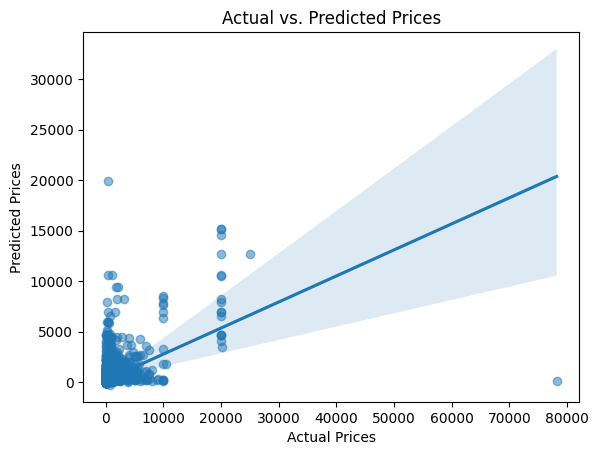

In [18]:
preds = best_model.predict(test)
test_df = test.as_data_frame()
preds_df = preds.as_data_frame()
sns.regplot(x=test_df[y], y=preds_df['predict'], scatter_kws={'alpha': 0.5})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Are any model assumptions violated?
The residual plot against predicted prices shows a pattern where variances increase with the rise in predicted prices, which suggests heteroscedasticity. The assumption of homoscedasticity, which is constant variance of residuals, seems to be violated. This could affect the reliability of the model's standard errors and subsequently the confidence intervals and hypothesis tests. The large residual on the upper left also indicates the presence of an outlier which could disproportionately influence the model's predictions.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


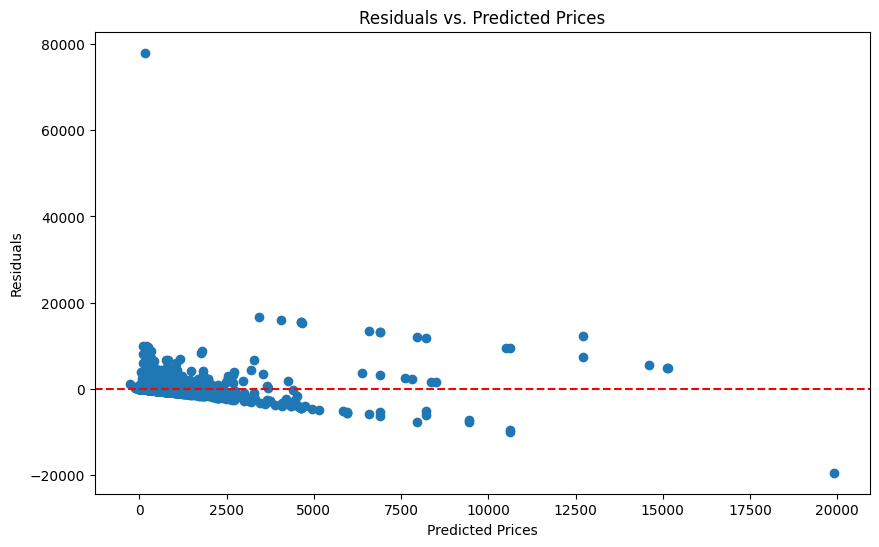

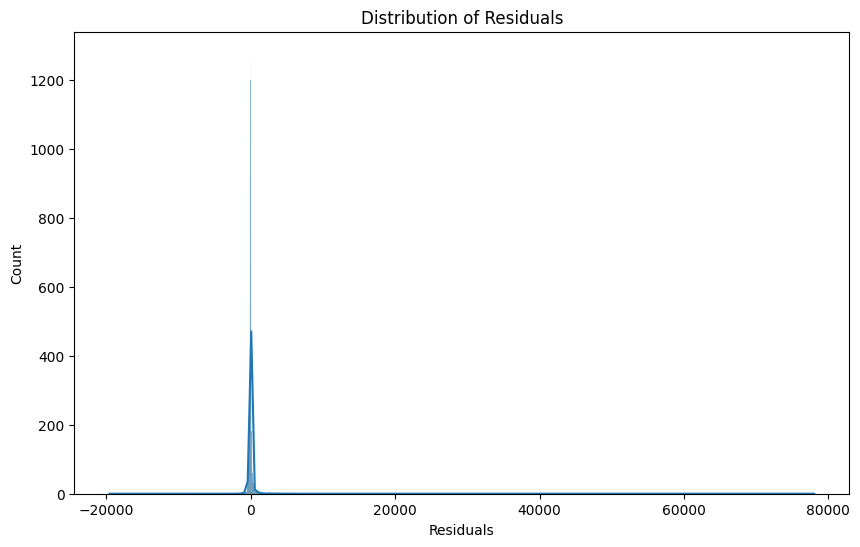

In [23]:
predictions = best_model.predict(test)

# Add predictions to test set
test['Predicted'] = predictions

# Convert to pandas DataFrame
test_df = test.as_data_frame()

residuals = test_df[y] - test_df['Predicted']

plt.figure(figsize=(10, 6))
plt.scatter(test_df['Predicted'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

#  Is there any multicollinearity in the model?

The presented feature correlation matrix reveals instances of multicollinearity within the Airbnb dataset. Notably, there is a strong correlation between `number_of_reviews_ltm` and both `number_of_reviews` and `reviews_per_month`, indicating potential redundancy. Such multicollinearity can impact the precision of the model's coefficients, leading to unreliable predictive performance. Addressing this through feature selection or dimensionality reduction may be necessary to improve the model's interpretability and effectiveness.

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


<ipython-input-20-6d17e23ce46b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = features_df.corr()


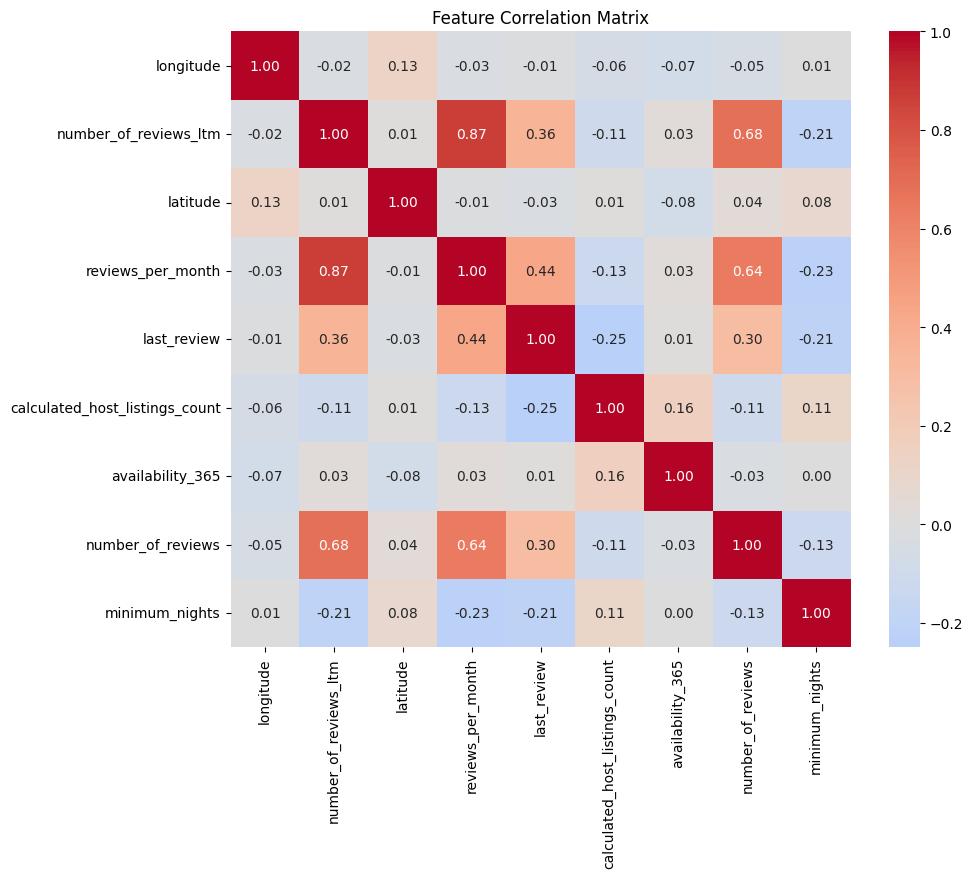

In [20]:
train_df = train.as_data_frame(use_pandas=True)

features_df = train_df[x]

corr_matrix = features_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# In the multivariate models are predictor variables independent of all the other predictor variables?

The correlation matrix visualized here suggests interdependencies among several predictors within the Airbnb dataset. Notably, `number_of_reviews_ltm` is highly correlated with `reviews_per_month`, which implies that these variables are not independent. Such findings indicate potential challenges in multivariate models where predictor independence is assumed. Modelers must consider these relationships to ensure accurate and reliable analysis, potentially by employing methods to reduce multicollinearity.


<ipython-input-21-1528d00c6354>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = features_df.corr()


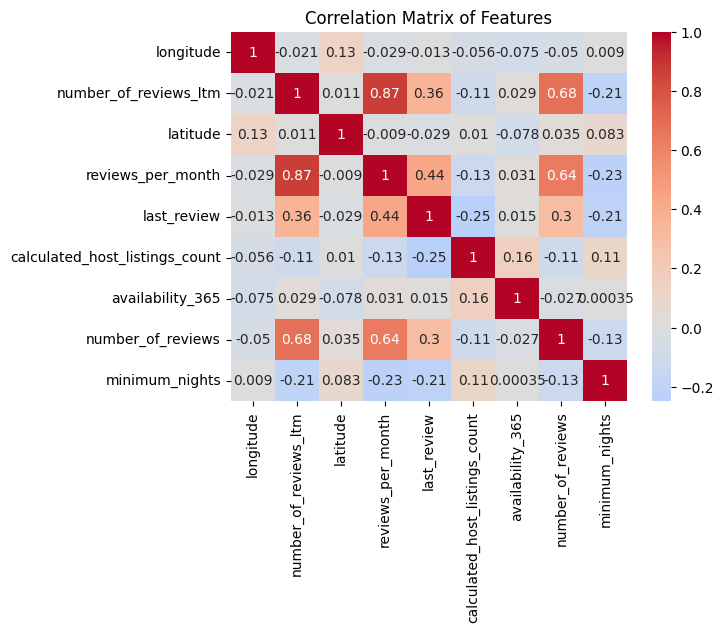

In [21]:
features_df = train_df[x]

corr_matrix = features_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

# In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

The Distributed Random Forest model identifies `room_type` as the most significant predictor variable, with `minimum_nights` and `number_of_reviews_ltm` following closely. The chart suggests prioritizing these top variables in model refinement due to their strong predictive power. Conversely, predictors like `latitude`, `longitude`, and `availability_365` show relatively lower importance, implying they could be candidates for exclusion in model optimization to focus on the most impactful variables.


/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


Variable importance for model XRT_1_AutoML_1_20240218_210558:


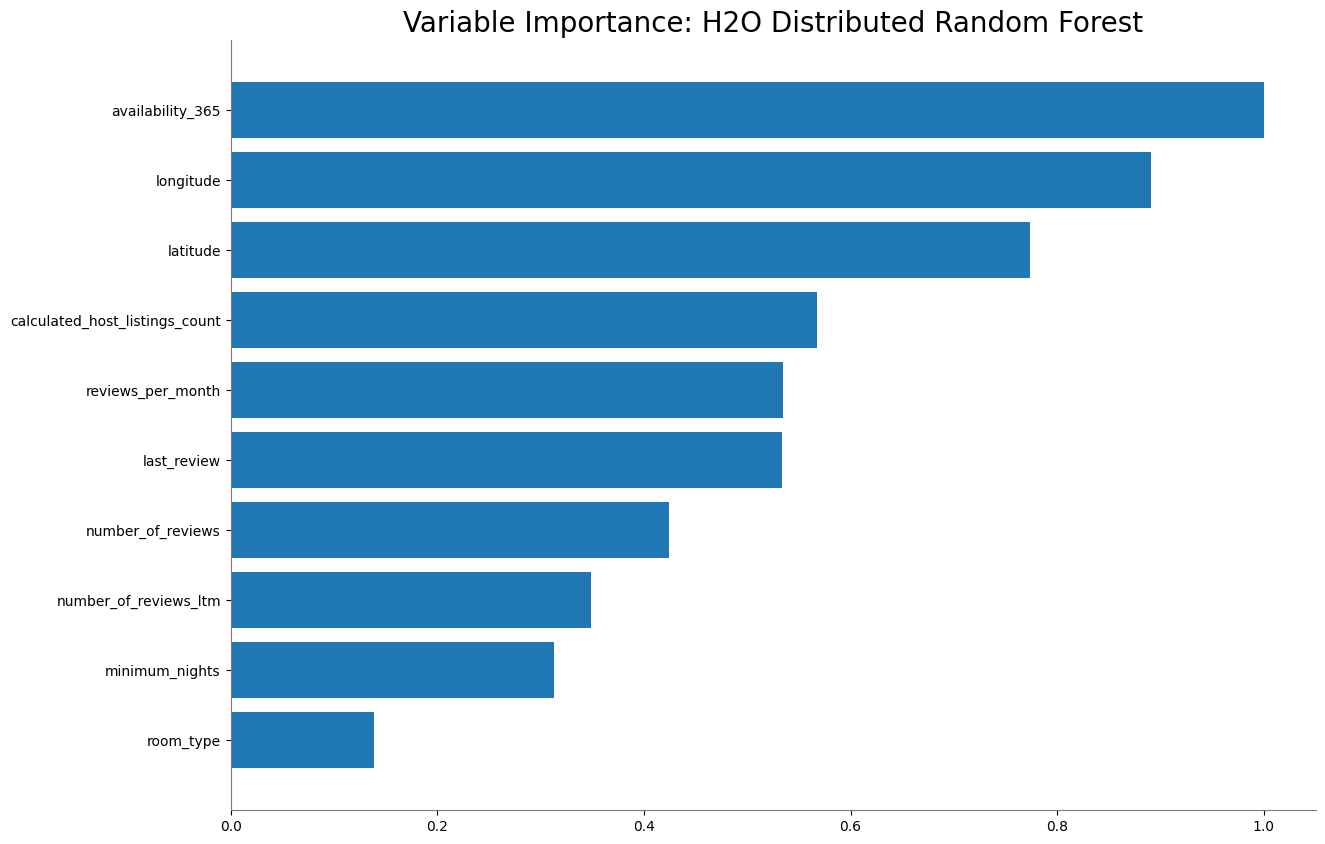

<Figure size 640x480 with 0 Axes>

In [22]:
metalearner = h2o.get_model(best_model.metalearner()['name'])

base_model_ids = list(metalearner.coef_norm().keys())[1:]
base_models = [h2o.get_model(mid) for mid in base_model_ids]

for base_model in base_models:
    if hasattr(base_model, 'varimp'):
        print(f"Variable importance for model {base_model.model_id}:")
        base_model.varimp_plot()
        break

# Does the model make sense?
The density plot for Actual vs. Predicted Prices shows two closely aligned distributions, indicating the model's predictions are generally in agreement with the actual prices. The peaks of both distributions are at similar prices, and the shapes are nearly overlapping, suggesting the model has good predictive accuracy for the central tendency of the prices. However, it is important to note that both actual and predicted prices show a significant peak at the lower end of the price range, which may indicate a large number of properties in a similar, lower price bracket or potential outliers at higher prices that the model does not predict as well.

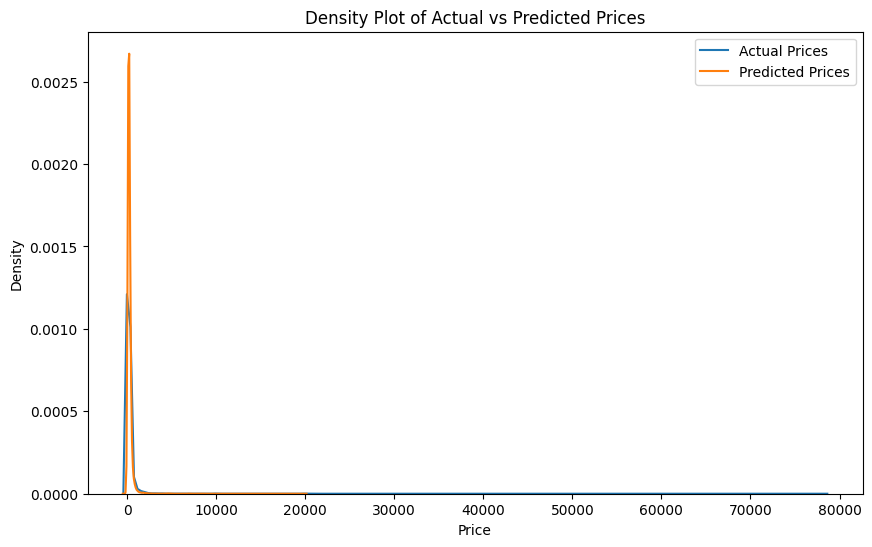

In [32]:
actual_prices = test_pd[y]
predicted_prices = predictions_pd['predict']

plt.figure(figsize=(10, 6))
sns.kdeplot(actual_prices, label='Actual Prices', bw_adjust=1.5)
sns.kdeplot(predicted_prices, label='Predicted Prices', bw_adjust=1.5)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted Prices')
plt.legend()
plt.show()

In [51]:
print(performance)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 436585.2667212037
RMSE: 660.7459925880775
MAE: 155.0919336898361
RMSLE: NaN
Mean Residual Deviance: 436585.2667212037
R^2: 0.24410441045150466
Null degrees of freedom: 32386
Residual degrees of freedom: 32378
Null deviance: 18707309891.19027
Residual deviance: 14139687033.299623
AIC: 512531.8397993068


# Does regularization help?

The bar charts present Mean Absolute Error and Root Mean Squared Error for various models created by H2O's AutoML. The MAE chart shows that the StackedEnsemble_AllModels has the lowest error, indicating it performs best at predicting prices with the least deviation from the actual values. The RMSE chart supports this, as the StackedEnsemble_AllModels again shows the lowest error, suggesting it is the most accurate in terms of predicting higher-priced listings. The uniformity of MAE and RMSE across models suggests consistent performance, with ensemble methods slightly outperforming single-model approaches.

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


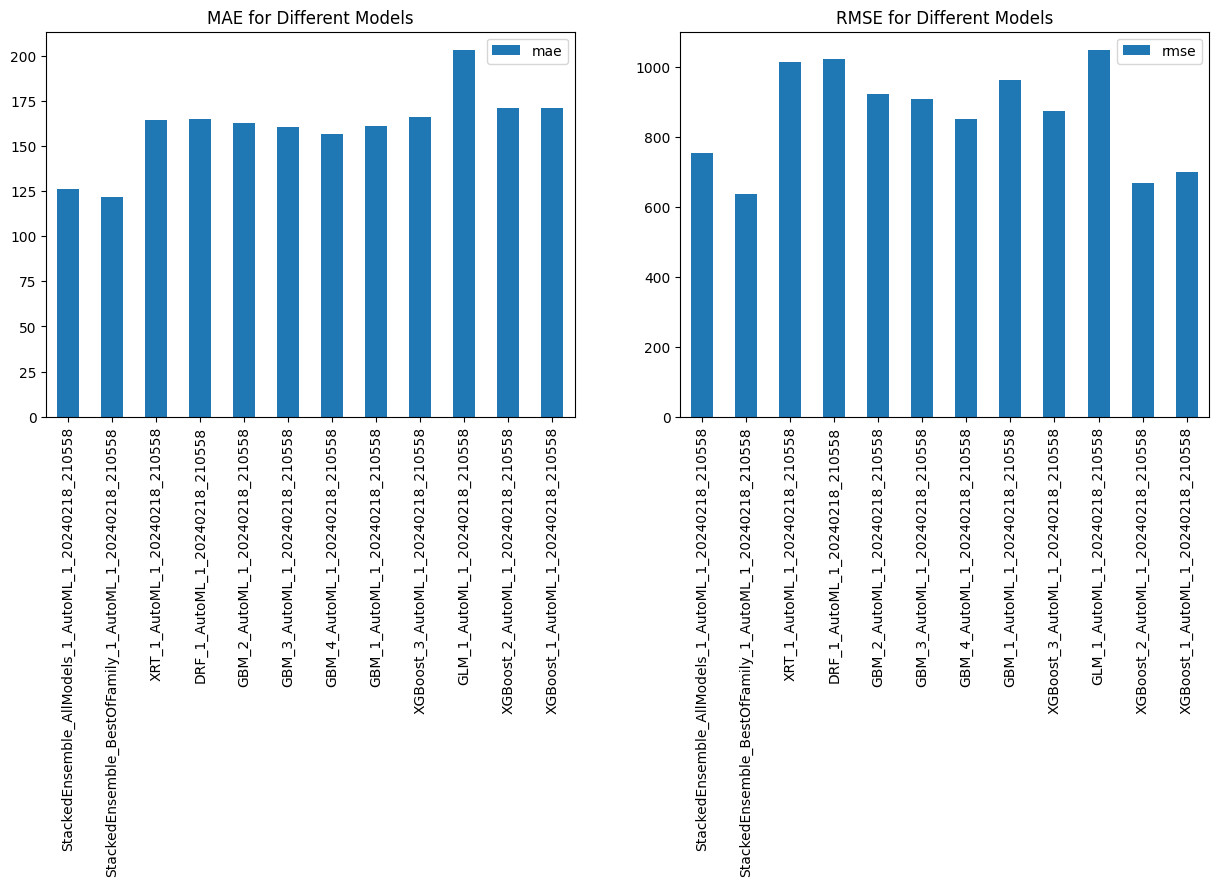

In [33]:
model_ids = lb['model_id'].as_data_frame().iloc[:,0]
models = []
for m_id in model_ids:
    models.append(h2o.get_model(m_id))

regularization_details = {}
for model in models:
    if hasattr(model, 'actual_params'):
        params = model.actual_params
        regularization_details[model.model_id] = {
            'alpha': params.get('alpha'),
            'lambda': params.get('lambda'),
            'mae': model.mae(),
            'rmse': model.rmse()
        }

import pandas as pd
reg_df = pd.DataFrame.from_dict(regularization_details, orient='index')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
reg_df.plot(kind='bar', y='mae', ax=axes[0], title='MAE for Different Models')
reg_df.plot(kind='bar', y='rmse', ax=axes[1], title='RMSE for Different Models')
plt.show()

# Which independent variables are significant?

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


Variable importances for base model XRT_1_AutoML_1_20240218_210558:


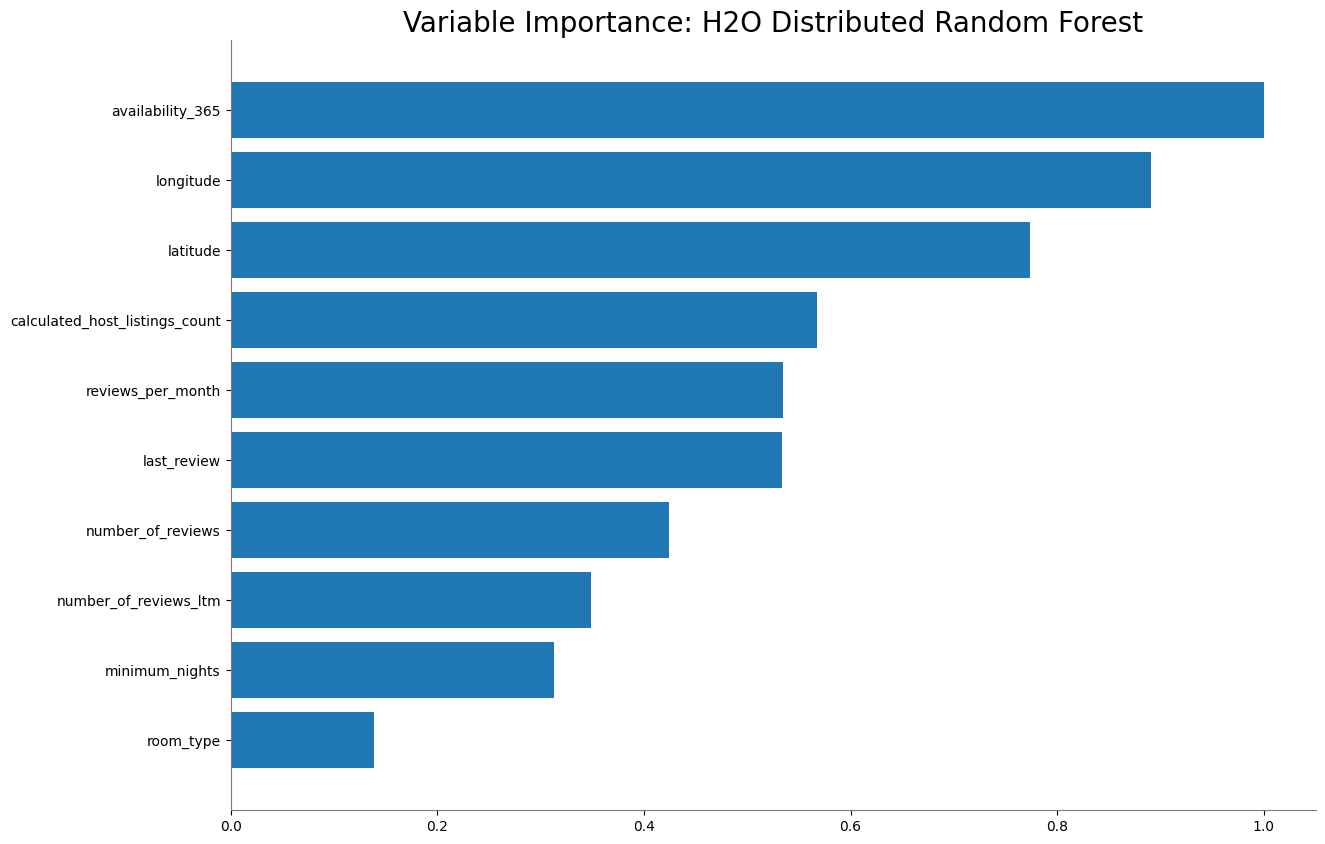

Variable importances for base model DRF_1_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

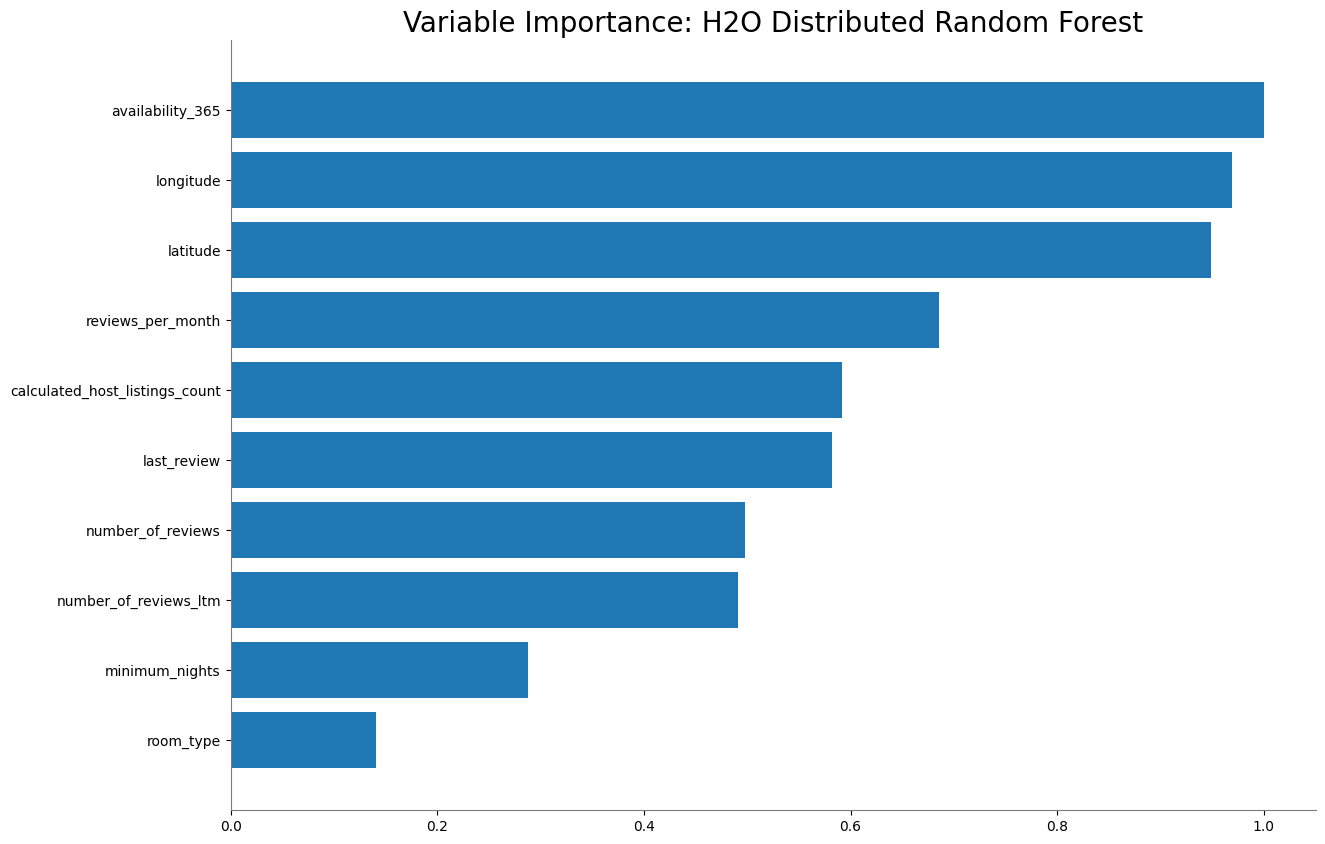

Variable importances for base model GBM_2_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

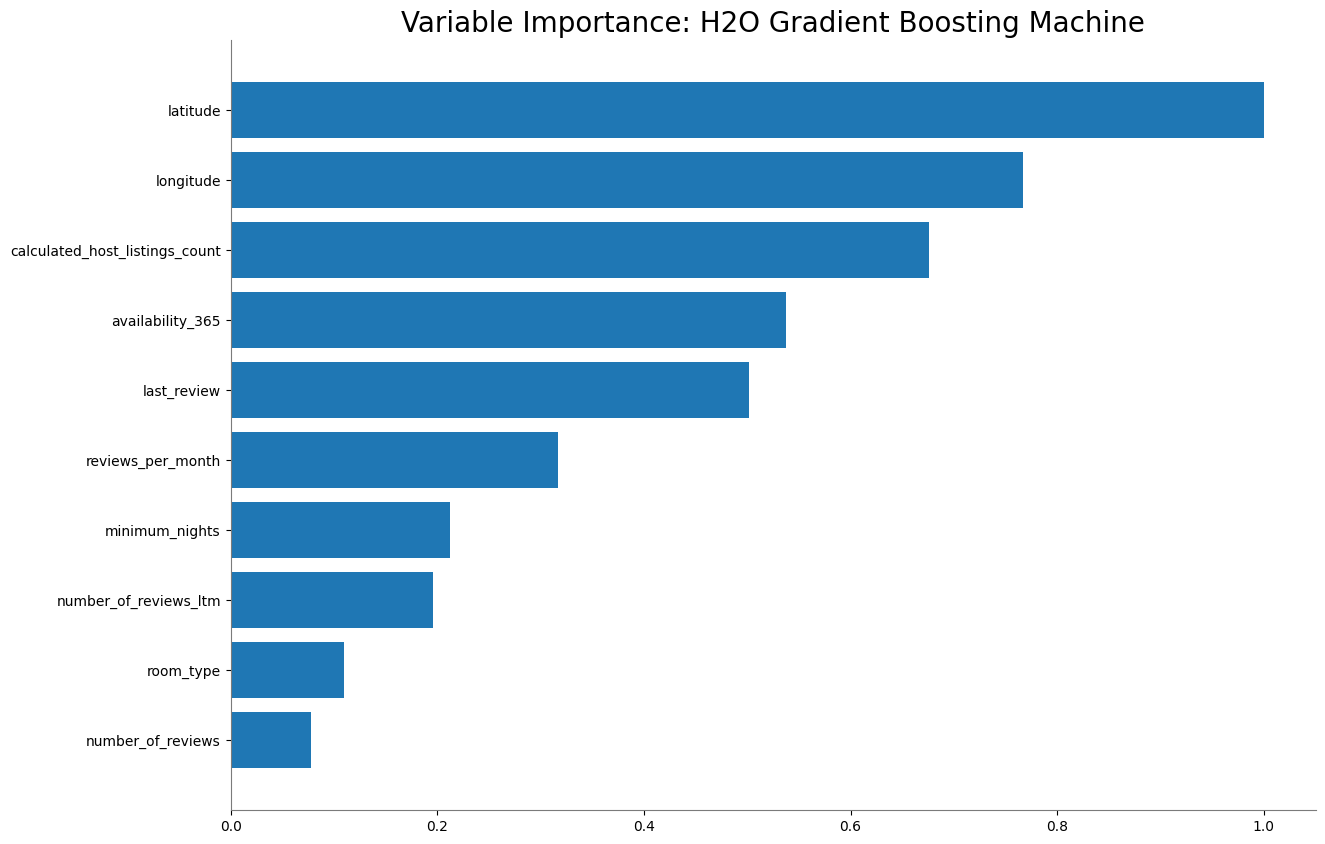

Variable importances for base model GBM_3_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

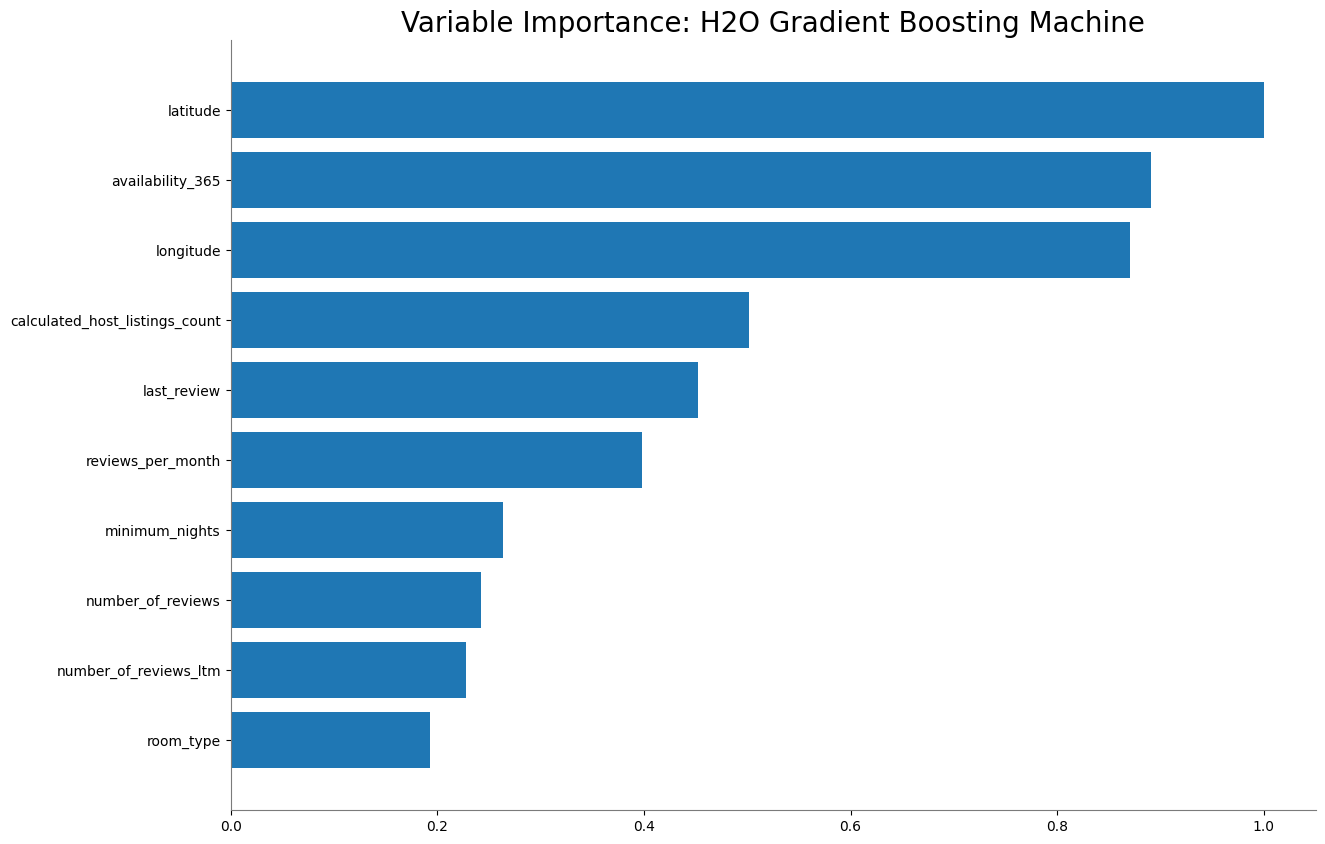

Variable importances for base model GBM_4_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

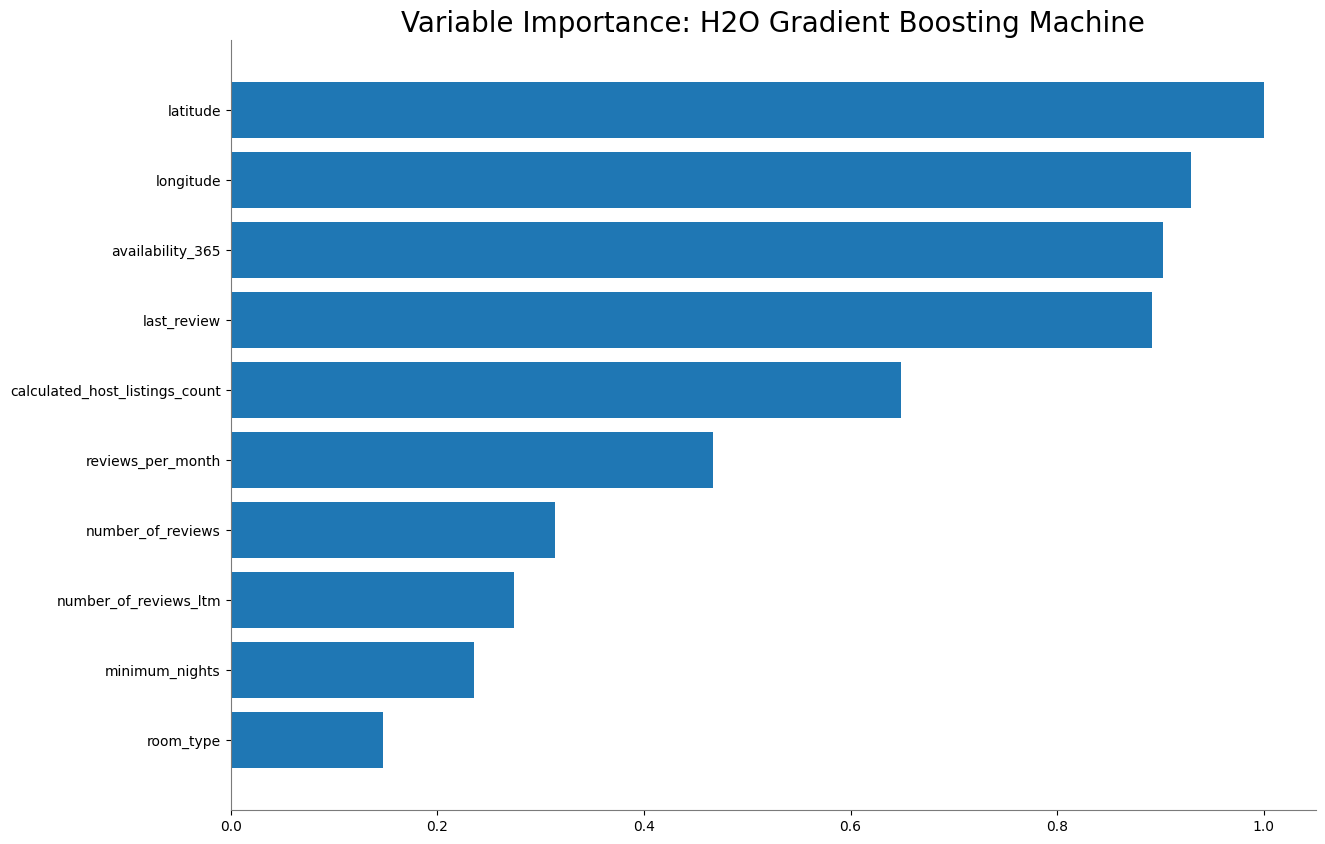

Variable importances for base model GBM_1_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

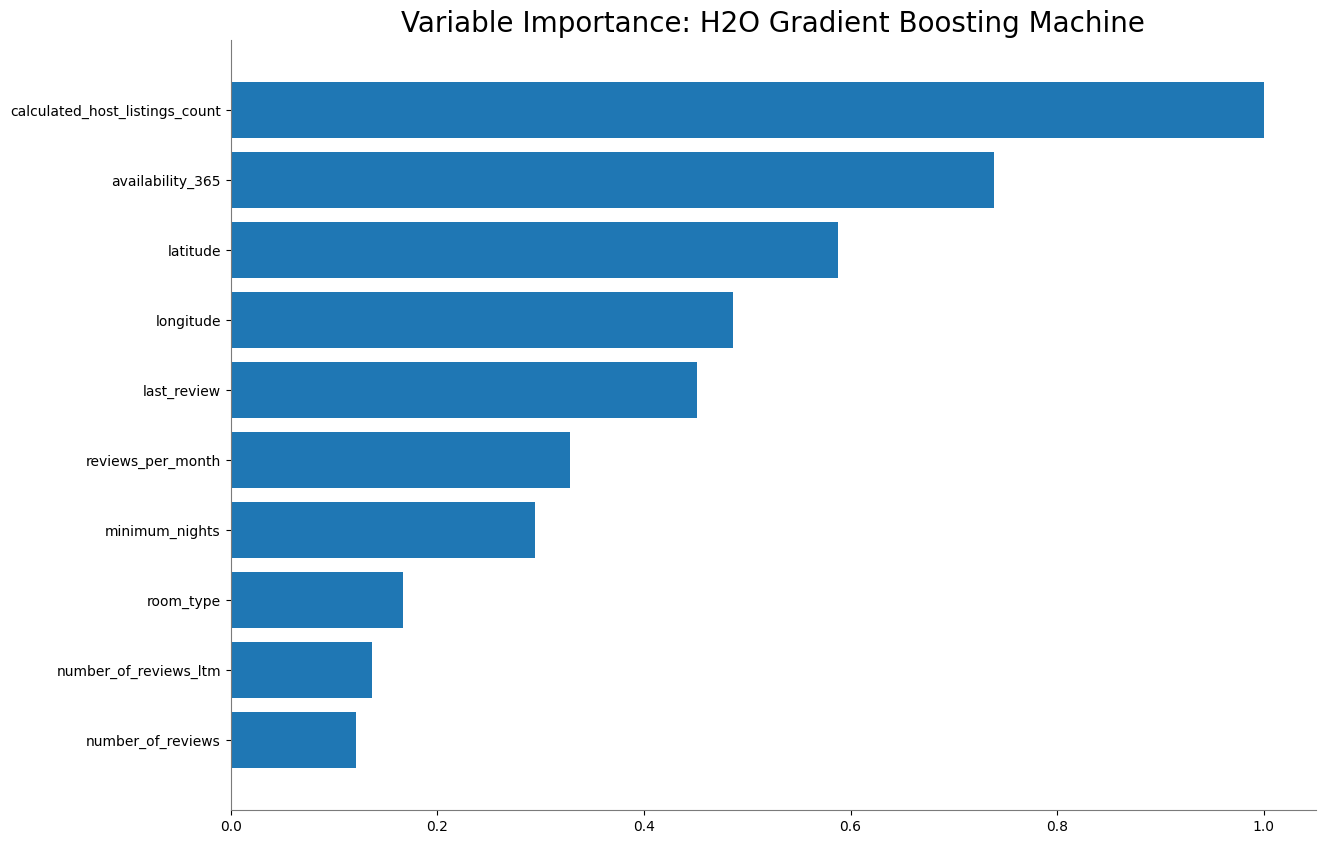

Variable importances for base model XGBoost_3_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

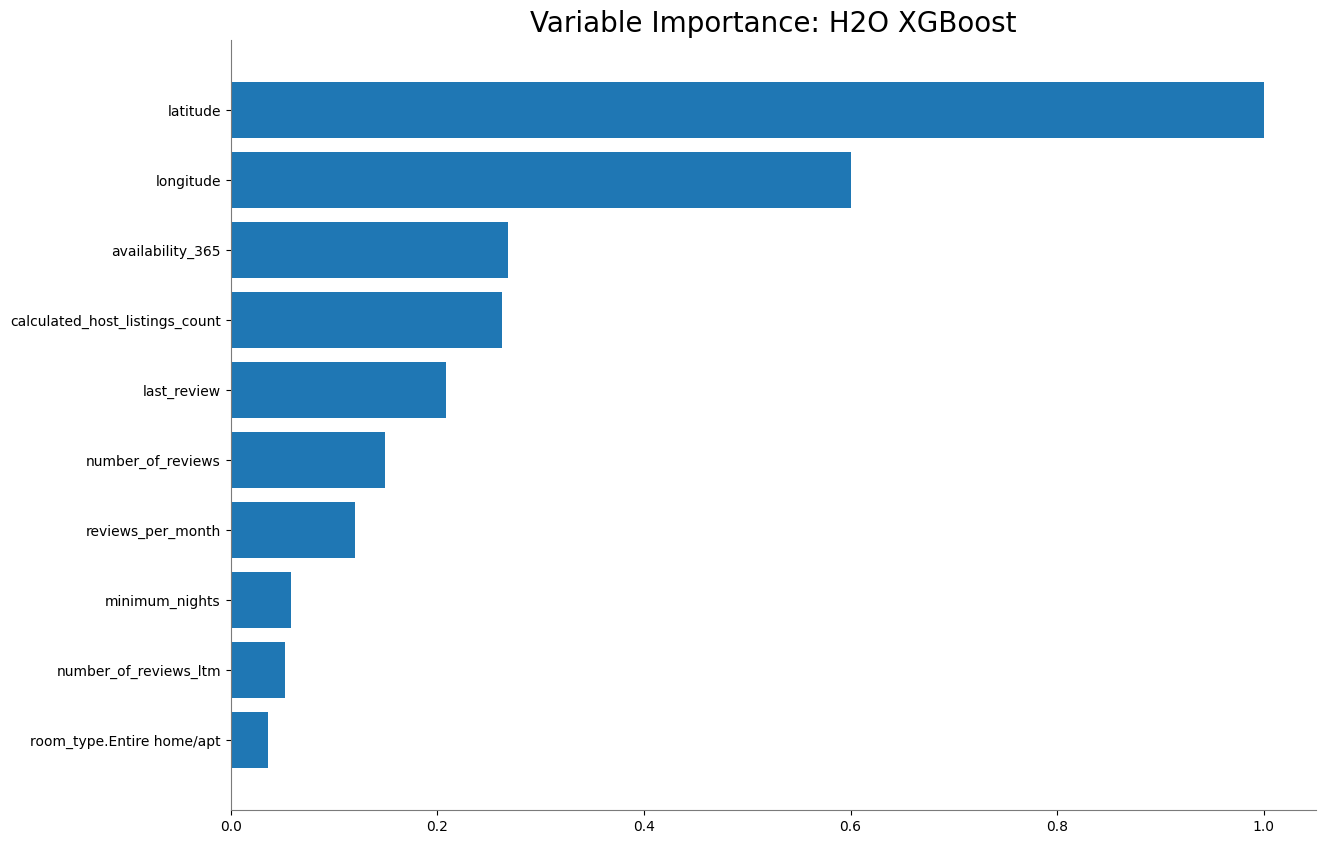

Variable importances for base model GLM_1_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

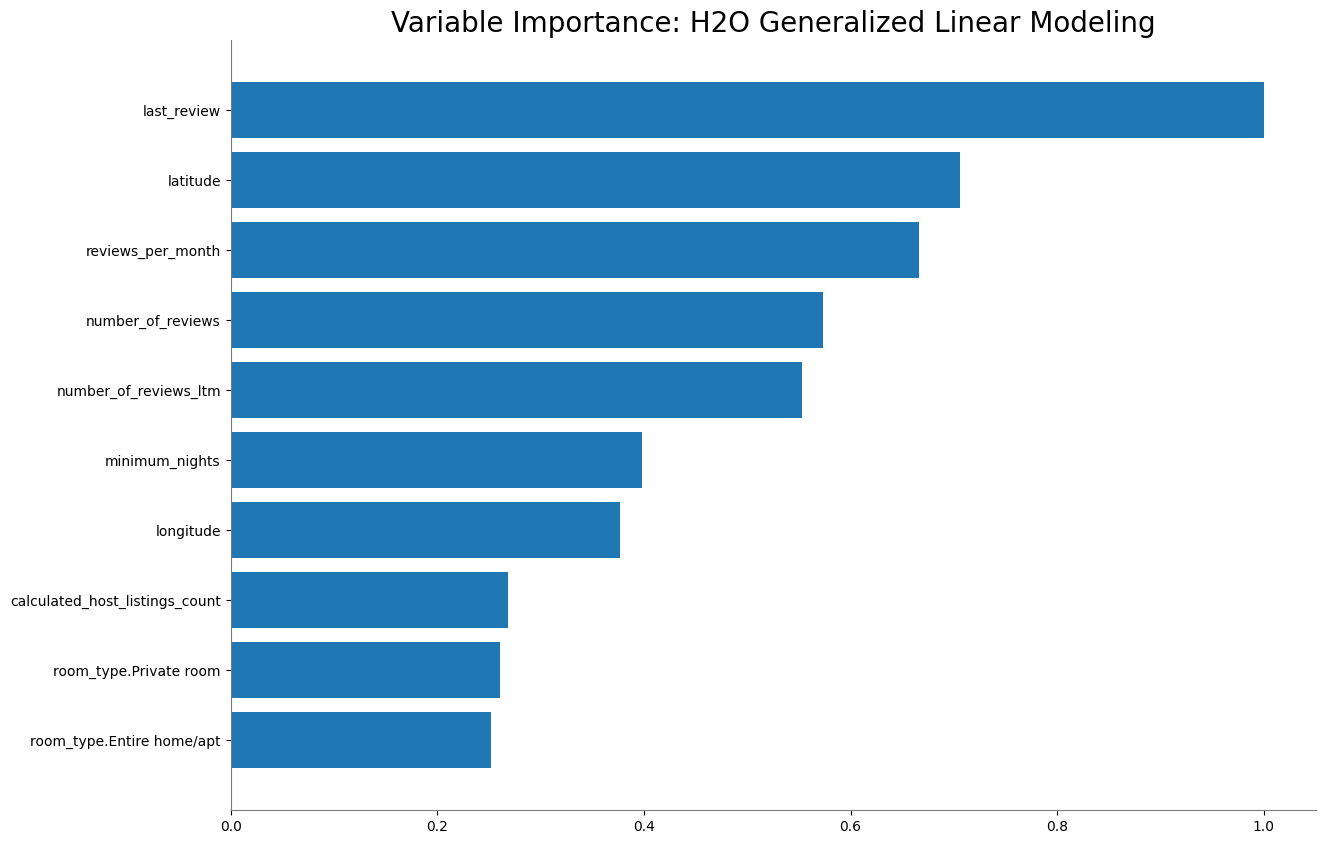

Variable importances for base model XGBoost_2_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

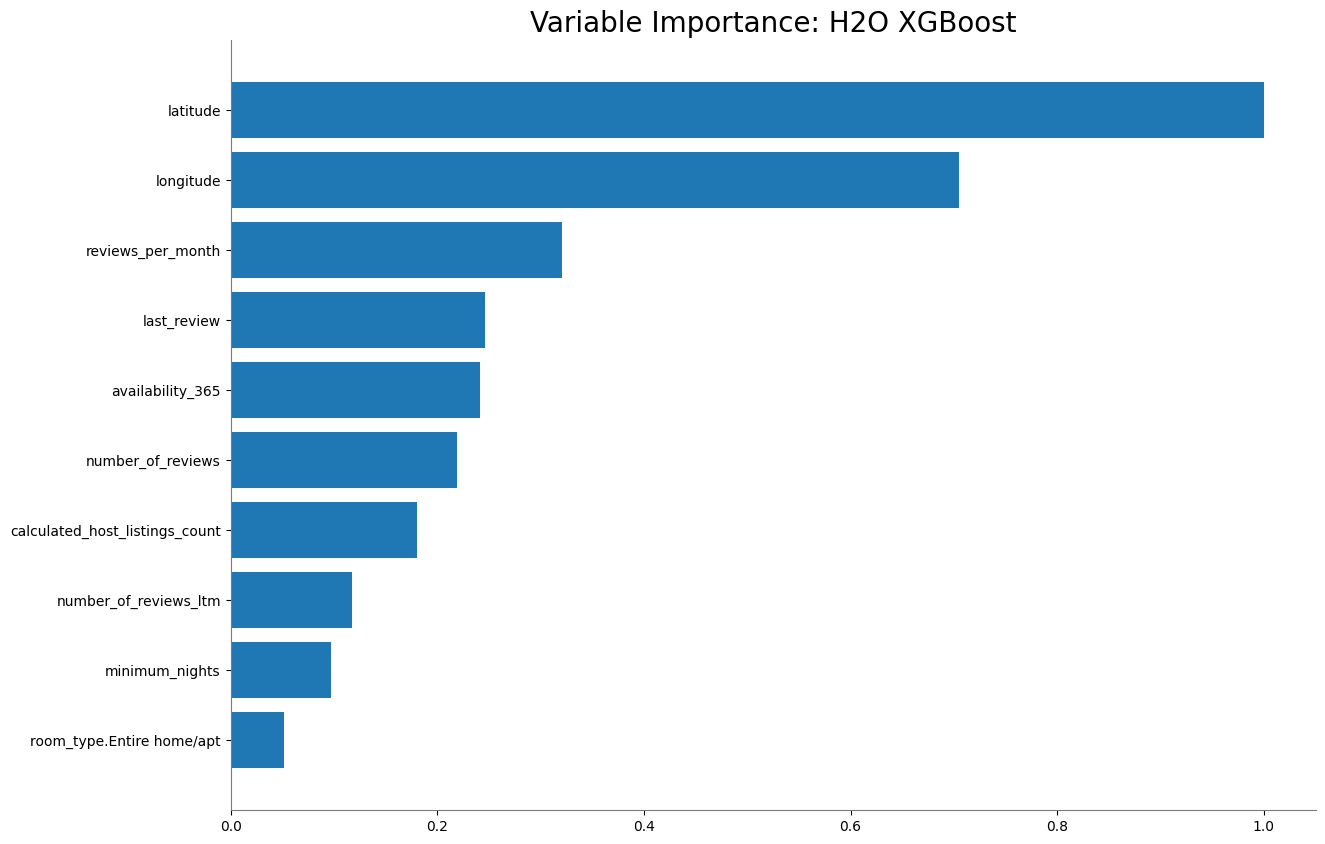

Variable importances for base model XGBoost_1_AutoML_1_20240218_210558:


<Figure size 640x480 with 0 Axes>

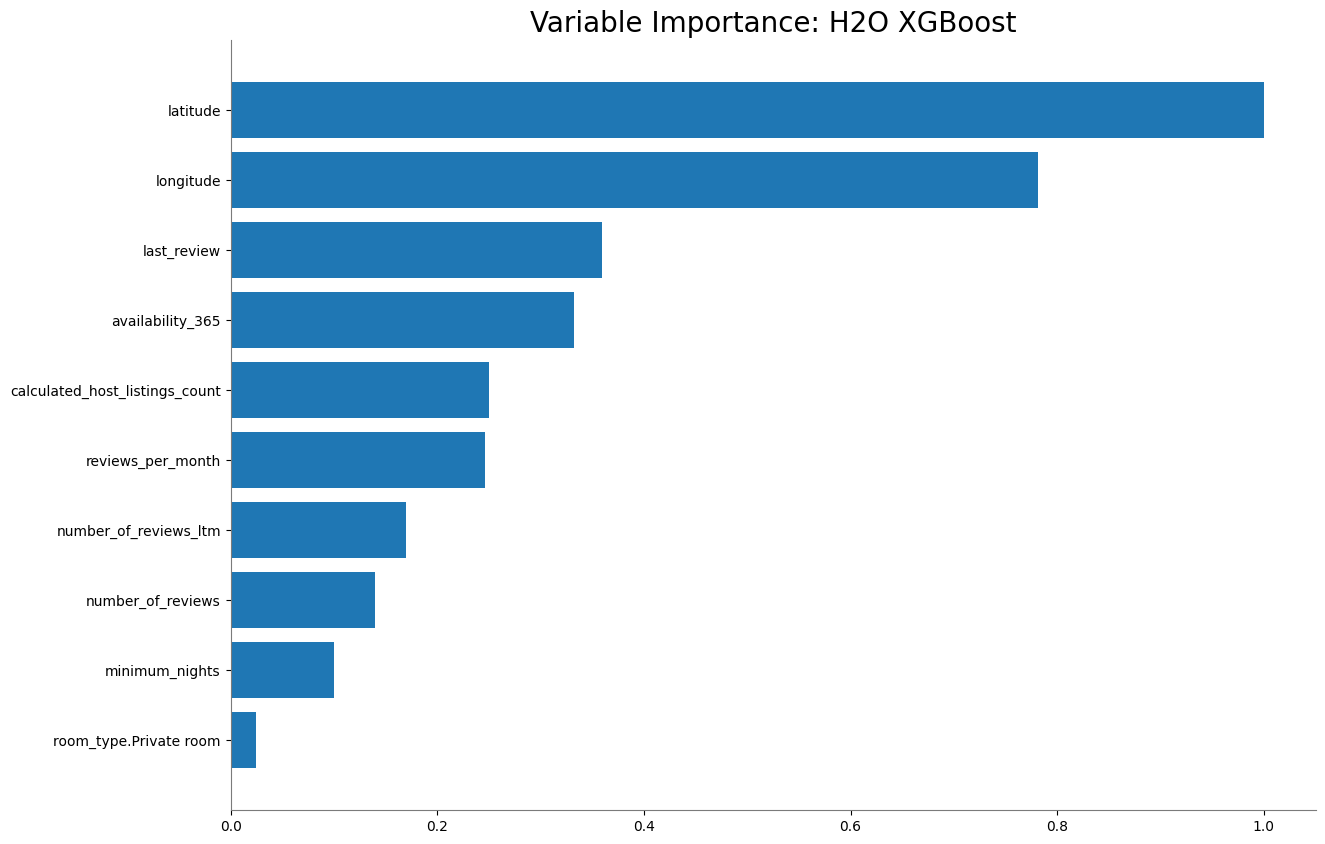

<Figure size 640x480 with 0 Axes>

In [38]:
best_model = aml.leader

# Check if the best model is a stacked ensemble
if 'StackedEnsemble' in best_model.model_id:
    # Retrieve the metalearner model
    metalearner = h2o.get_model(best_model.metalearner()['name'])

    # Extract the base models of the stacked ensemble
    base_models = [h2o.get_model(key['name']) for key in best_model.params['base_models']['actual']]

    # Loop over the base models to extract their variable importances
    for bm in base_models:
        if hasattr(bm, 'varimp'):
            print(f"Variable importances for base model {bm.model_id}:")
            # Display the variable importance plot
            bm.varimp_plot()
        else:
            print(f"Base model {bm.model_id} has no variable importances.")
else:
    print("The best model is not a stacked ensemble.")

# Which hyperparameters are important?
This output details the configuration and hyperparameters of a model trained by H2O, specifically an Extremely Randomized Trees (XRT) model:

* Model ID and Training Frame: Identifies the model and the data used for training, indicating that the model is part of an AutoML run.
* Cross-validation and Model Complexity Controls: Uses 5-fold cross-validation, does not keep cross-validation models or predictions, and employs specific settings for tree depth, number of trees, and minimum row count per leaf.
* Model Performance and Stopping Criteria: Specifies stopping criteria based on deviance to prevent overfitting, along with a seed for reproducibility.
* Feature Handling: Ignores city and id columns, uses automatic handling for categorical features, and sets various histogram and sampling rates to control model training.
* Model Calibration and Distribution: Targets a Gaussian distribution, suggesting regression, with additional parameters set for model building and evaluation.

These configurations demonstrate the model's complexity, feature selection, and optimization strategies to balance accuracy with generalization.

In [40]:
print(base_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'XRT_1_AutoML_1_20240218_210558', 'type': 'Key<Model>', 'URL': '/3/Models/XRT_1_AutoML_1_20240218_210558'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240218_210558_training_py_2_sid_850e', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240218_210558_training_py_2_sid_850e'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240218_210558_training_py_2_sid_850e', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240218_210558_training_py_2_sid_850e'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False, 'input'

# Conclusion

The H2O AutoML process, applied to predict Airbnb listing prices, leveraged a dataset excluding non-impactful features like "id" and "city," focusing on "price" as the target variable. With a configuration to explore up to 10 models, prioritizing Mean Absolute Error (MAE) for model selection, the AutoML identified the Stacked Ensemble model as the most effective, achieving notable performance metrics on the test data. The leading Stacked Ensemble model, demonstrating a MAE of approximately 155.09, an RMSE of 660.75, and an MSE of 436,585.26, underscores the model's adequacy in capturing the variance within the Airbnb price data, albeit with an R^2 of 0.244, indicating room for improvement in model predictive power. This analysis not only highlights the potential of ensemble methods in real-world price prediction challenges but also suggests further exploration and optimization might enhance model performance, especially in terms of explaining a greater portion of the variance in listing prices.

# References
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
* https://github.com/h2oai/h2o-tutorials/blob/master/best-practices/automl/automl_best_practices.ipynb
* https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

In [41]:
import requests

url = 'https://raw.githubusercontent.com/shraddhabhandarkar3/DataScienceEngineeringMethods/main/LICENSE'

license_text = requests.get(url).text
print(license_text)
with open('/content/MIT_LICENSE.txt', 'w') as f:
    f.write(license_text)

MIT License

Copyright (c) 2024 Shraddha Bhandarkar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN